In [1]:
import pandas as pd
import numpy as np


#datset loading

train_data= pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [ ]:
train_data.head(10)


In [ ]:
test_data.head()

In [15]:
train_data.shape

(100000, 52)

In [16]:
test_data.shape

(50000, 51)

In [ ]:
train_data.describe()

In [ ]:
test_data.describe()

In [ ]:
train_data.info()

In [ ]:
test_data.info()

In [ ]:
train_data.dtypes

In [ ]:
test_data.dtypes

In [ ]:
train_data.isna().sum()

In [ ]:
test_data.isna().sum()

In [2]:
print(train_data.groupby('id').size())

id
0        1
1        1
2        1
3        1
4        1
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Length: 100000, dtype: int64


<AxesSubplot:xlabel='target', ylabel='count'>

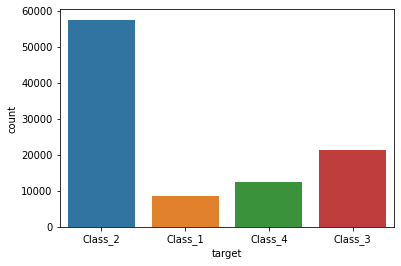

In [3]:
import seaborn as sns
sns.countplot(x = 'target',data = train_data)

In [8]:
X = pd.DataFrame(train_data.drop(['id', 'target'] , axis=1))

In [9]:
X

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,0,0,1,0,1,0,0,0,0,0,...,3,0,0,21,0,0,0,0,0,0
1,0,0,0,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,2,...,0,0,1,0,0,0,0,13,2,0
3,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,0,0,1,0,0,0,2,0,0,...,1,0,0,6,0,0,3,0,0,0
99996,0,0,0,0,0,0,0,1,2,0,...,0,0,2,0,0,0,10,0,0,0
99997,0,0,0,0,0,1,0,0,0,4,...,0,0,0,0,0,1,0,0,2,0
99998,0,0,0,0,1,0,0,0,0,5,...,0,0,0,0,0,0,1,0,4,0


In [4]:
from sklearn.preprocessing import LabelEncoder

lenc =LabelEncoder()

y = pd.DataFrame(lenc.fit_transform(train_data['target']), columns= ['target'])

In [7]:
y

,target
0,1
1,0
2,0
3,3
4,1
...,...
99995,0
99996,1
99997,2
99998,1


In [5]:
test_new =pd.DataFrame(test_data.drop(['id'], axis=1))

In [6]:
test_new

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,0,0,0,0,0,0,4,4,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,2,0,7,7,...,3,0,1,0,0,0,1,0,2,1
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,6,0
3,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,6,9,14,3
4,0,0,0,0,0,0,1,0,4,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0,0,0,0,0,0,1,5,0,...,0,1,0,0,0,3,0,0,3,0
49996,0,0,0,0,0,0,10,0,0,0,...,0,0,0,1,0,0,0,0,0,3
49997,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
49998,0,0,0,0,1,0,0,0,0,4,...,1,0,0,0,0,0,0,0,0,1


In [12]:
 import xgboost as xgb

 model =xgb.XGBClassifier()

 model.fit(X,y)


y_pre = model.predict_proba(test_new)

[10:39:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [13]:
y_pre

array([[0.09926839, 0.49180526, 0.27283388, 0.13609241],
       [0.11276478, 0.5645333 , 0.19870688, 0.12399501],
       [0.07009619, 0.62461114, 0.20511264, 0.10018008],
       ...,
       [0.09020639, 0.5148503 , 0.21852347, 0.17641976],
       [0.08039591, 0.56877637, 0.17110986, 0.17971787],
       [0.13353166, 0.5529988 , 0.19729374, 0.11617582]], dtype=float32)

In [14]:
sample_sub = pd.read_csv('predictions.csv')

pred = pd.DataFrame(y_pre, columns= ["Class_1", "Class_2", "Class_3", "Class_4"])


pred['id'] = sample_sub['id']



In [15]:
pred

,Class_1,Class_2,Class_3,Class_4,id
0,0.099268,0.491805,0.272834,0.136092,100000
1,0.112765,0.564533,0.198707,0.123995,100001
2,0.070096,0.624611,0.205113,0.100180,100002
3,0.088748,0.566618,0.273324,0.071309,100003
4,0.071541,0.638918,0.185837,0.103704,100004
...,...,...,...,...,...
49995,0.050944,0.746954,0.115518,0.086584,149995
49996,0.076095,0.635605,0.158504,0.129797,149996
49997,0.090206,0.514850,0.218523,0.176420,149997
49998,0.080396,0.568776,0.171110,0.179718,149998


In [18]:
y_pre.shape

(50000, 4)